In [108]:
# imports
import os
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [109]:
# Define the path to items folder
items_folder_path = '/Users/MeganWagnerSmith/Desktop/Animal_Crossing_Project/animal-crossing-new-horizons-nookplaza-dataset/'

# List all item files
item_files = [f for f in os.listdir(items_folder_path) if f.endswith('.csv') and f != 'villagers.csv']


In [110]:
# Initialize DataFrame to hold all item data
all_items_df = pd.DataFrame()

# Load each item file and concatenate it to the all_items_df
for file_name in item_files:
    file_path = os.path.join(items_folder_path, file_name)
    temp_df = pd.read_csv(file_path)

In [111]:
# Create path to save visualizations to directory
viz_directory = '/Users/MeganWagnerSmith/Desktop/Animal_Crossing_Project/ACNH-Home-Decor/Visualizations'

In [112]:
# Create DataFrame to store all item data 
# Initialize DataFrame
all_items_df = pd.DataFrame()

for file_name in item_files:
    file_path = os.path.join(items_folder_path, file_name)
    temp_df = pd.read_csv(file_path)

    # Check if 'Buy' column exists in the DataFrame
    if 'Buy' in temp_df.columns:
        temp_df['Buy'].replace('NFS', pd.NA, inplace=True)
        temp_df['Buy'] = pd.to_numeric(temp_df['Buy'], errors='coerce')
    else:
        # Assign NaN if 'Buy' column does not exist
        temp_df['Buy'] = pd.NA

    # Check if 'Sell' column exists
    if 'Sell' in temp_df.columns:
        temp_df['Sell'].replace('NFS', pd.NA, inplace=True)
        temp_df['Sell'] = pd.to_numeric(temp_df['Sell'], errors='coerce')
    else:
        # Assign NaN if 'Sell' column does not exist
        temp_df['Sell'] = pd.NA
    # Select only necessary columns
    if 'Internal ID' in temp_df.columns:
        columns_to_select = ['Internal ID', 'Name', 'Buy', 'Sell']
        temp_df = temp_df[columns_to_select]
        temp_df = temp_df[columns_to_select]
    else:
        # If 'Internal ID' column does not exist, you may choose to skip the file or handle it differently
        continue  # Skip this file
    all_items_df = pd.concat([all_items_df, temp_df])

# Remove duplicates based on the 'Name' column
all_items_df.drop_duplicates(subset=['Internal ID'], inplace=True)

# Display the first few rows of the combined items DataFrame
print(all_items_df.head())

# Check for duplicates
duplicates = all_items_df[all_items_df.duplicated(subset=['Internal ID', 'Name'], keep=False)]
print(duplicates)

   Internal ID                    Name       Buy     Sell
0       3948.0       accessories stand    1500.0    375.0
5      12579.0    ACNH Nintendo Switch   35960.0   8990.0
6       7080.0  agrias butterfly model       NaN   9000.0
7       7453.0      aluminum briefcase  100000.0  25000.0
9        849.0                     amp    5100.0   1275.0
Empty DataFrame
Columns: [Internal ID, Name, Buy, Sell]
Index: []


In [113]:
# Count the total number of NaN values in the 'Internal ID' column
nan_count_internal_id = all_items_df['Internal ID'].isna().sum()
print("Total number of NaN values in 'Internal ID':", nan_count_internal_id)

# Drop NaN values
if nan_count_internal_id > 0:
    all_items_df.dropna(subset=['Internal ID'], inplace=True)

# Convert 'Internal ID' to integers
all_items_df['Internal ID'] = all_items_df['Internal ID'].astype(int)

# Display the first few rows to check the format
print(all_items_df.head())

Total number of NaN values in 'Internal ID': 1
   Internal ID                    Name       Buy     Sell
0         3948       accessories stand    1500.0    375.0
5        12579    ACNH Nintendo Switch   35960.0   8990.0
6         7080  agrias butterfly model       NaN   9000.0
7         7453      aluminum briefcase  100000.0  25000.0
9          849                     amp    5100.0   1275.0


In [114]:
# Load villagers Dataframe
villagers = pd.read_csv('villagers.csv')

def calculate_home_value(row, items_df):
    # Split the item IDs from furniture list, convert to integers
    furniture_ids = [int(x) for x in row['Furniture List'].split(';')] if pd.notna(row['Furniture List']) else []
    # Filter the all_items_df for the given IDs
    furniture_items = items_df[items_df['Internal ID'].isin(furniture_ids)]
    
    # Use name to filter items_df for wallpaper and flooring
    item_names = [row['Wallpaper'], row['Flooring']]
    wallpaper_flooring_items = items_df[items_df['Name'].isin(item_names)]
    
    # Combine furniture and wallpaper/flooring items
    house_items = pd.concat([furniture_items, wallpaper_flooring_items])
    
    # Calculate total buy and Sell Prices of home decor
    total_decor_buy_value = house_items['Buy'].sum()
    total_decor_sell_value = house_items['Sell'].sum()
    
    return total_decor_buy_value, total_decor_sell_value

# Apply the function to each villager/row in the villagers dataset
villagers[['Total Decor Buy Price', 'Total Decor Sell Price']] = villagers.apply(lambda row: calculate_home_value(row, all_items_df), axis=1, result_type='expand')

# Reorder columns

# Display the DataFrame with the calculated values
print(villagers[['Name', 'Total Decor Buy Price', 'Total Decor Sell Price']].head())
villagers.to_csv('villagers_complete.csv')

      Name  Total Decor Buy Price  Total Decor Sell Price
0  Admiral                18170.0                 11142.0
1  Agent S               102440.0                 28010.0
2    Agnes                58500.0                 20973.0
3       Al                29520.0                 14879.0
4  Alfonso                35200.0                 15010.0


In [115]:
# Calculate average cost to buy home decor, and average resale value
average_buy_value = round(villagers['Total Decor Buy Price'].mean(), 2)
average_sell_value = round(villagers['Total Decor Sell Price'].mean(), 2)

average_buy_value, average_sell_value

(105276.05, 42785.25)

In [116]:
# Find character with most expensive home decor
villagers.sort_values('Total Decor Buy Price', ascending=False).head(1)

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID,Total Decor Buy Price,Total Decor Sell Price
31,Becky,Chicken,Female,Snooty,Music,9-Dec,chicklet,K.K. Chorale,Gorgeous,Elegant,Purple,Pink,palace wall,palace tile,3954;1449;3958;794;2772;1058;1875;3681;987,chn09,D7Atj8BuHK6mgwwvZ,770690.0,193632.0


In [117]:
# Find character with most expensive home decor
villagers.sort_values('Total Decor Buy Price', ascending=True).head(10)

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID,Total Decor Buy Price,Total Decor Sell Price
378,Wade,Penguin,Male,Lazy,Nature,30-Oct,so it goes,Stale Cupcakes,Simple,Gorgeous,Light blue,Blue,ice wall,ice flooring,3503;3984;3497;3982;3978;2255;5150;2269;2266;2...,pgn09,cy2hRtipGaiHEBPd8,0.0,71700.0
242,Monty,Monkey,Male,Cranky,Education,7-Dec,g'tang,To The Edge,Cool,Cool,Yellow,Gray,autumn wall,forest flooring,10743;7142;3808;3805;808;4708;805;3806,mnk04,AB2WWajw4nPsxsQ5h,0.0,51080.0
50,Boomer,Penguin,Male,Lazy,Fitness,7-Feb,human,Farewell,Simple,Cool,Brown,Beige,iceberg wall,iceberg flooring,3500;3500;3500;3500;343;343;7281;5337;7142,pgn10,jqR8knKhx3kGYTSSd,0.0,24980.0
339,Sprinkle,Penguin,Female,Peppy,Play,20-Feb,frappe,K.K. Marathon,Cute,Elegant,Light blue,White,ice wall,ice flooring,3500;3500;3499;3983;4376;3978;3978;5150;3982;3984,pgn14,5ffTHHjgjsXGAcsb3,0.0,74270.0
254,Octavian,Octopus,Male,Cranky,Play,20-Sep,sucker,K.K. D&B,Cool,Simple,Black,White,starry-sky wall,lunar surface,1439;5676;1441;1447;1445;1443,ocp00,nLsc5geQY78JR7j4S,0.0,96900.0
319,Ruby,Rabbit,Female,Peppy,Nature,25-Dec,li'l ears,Stale Cupcakes,Cute,Active,Light blue,Pink,starry-sky wall,lunar surface,1439;1439;1445;1445;5676;1054;1442,rbt09,rjbSmp6a8PdsEw9BM,0.0,70730.0
179,Jacob,Bird,Male,Lazy,Nature,24-Aug,ya feel,K.K. Song,Simple,Simple,Green,Red,garbage-heap wall,garbage-heap flooring,7142;5972;3675;4038;3697;3229;5973;3672;1823,brd11,HBYP4stJTe3eGEepn,1620.0,4755.0
355,Tangy,Cat,Female,Peppy,Music,17-Jun,reeeeOWR,I Love You,Simple,Cute,Green,Yellow,orange wall,green retro flooring,4130;2596;7259;4546;3975;4134;4011;4127;1263;3...,cat05,eeMEC83wHWmKuHNvh,1660.0,39095.0
173,Hopper,Penguin,Male,Cranky,Music,6-Apr,slushie,Comrade K.K.,Cool,Simple,Yellow,Red,iceberg wall,iceberg flooring,3468;533;533;3500;3398;1111;5337;3697;3500,pgn03,FP3bdBM2RSjWTXYHK,1880.0,28850.0
41,Billy,Goat,Male,Jock,Play,25-Mar,dagnaabit,K.K. Song,Simple,Active,Blue,Purple,manga-library wall,garbage-heap flooring,7159;7163;7163;4034;1759;7161;3672;3672;1861;3...,goa02,dqEHTSBSx5iLhGiSC,1900.0,4460.0


In [118]:
# Find the item with the highest Buy Price in ACNH
highest_buy_value_item = all_items_df[all_items_df['Buy'] == all_items_df['Buy'].max()]

# Display the result
print(highest_buy_value_item)

     Internal ID         Name        Buy      Sell
482         5307  royal crown  1200000.0  300000.0


In [119]:
# Find the item with the highest Sell Price in ACNH
highest_sell_value_item = all_items_df[all_items_df['Sell'] == all_items_df['Sell'].max()]

# Display the result
print(highest_sell_value_item)

     Internal ID         Name        Buy      Sell
482         5307  royal crown  1200000.0  300000.0


<function matplotlib.pyplot.show(close=None, block=None)>

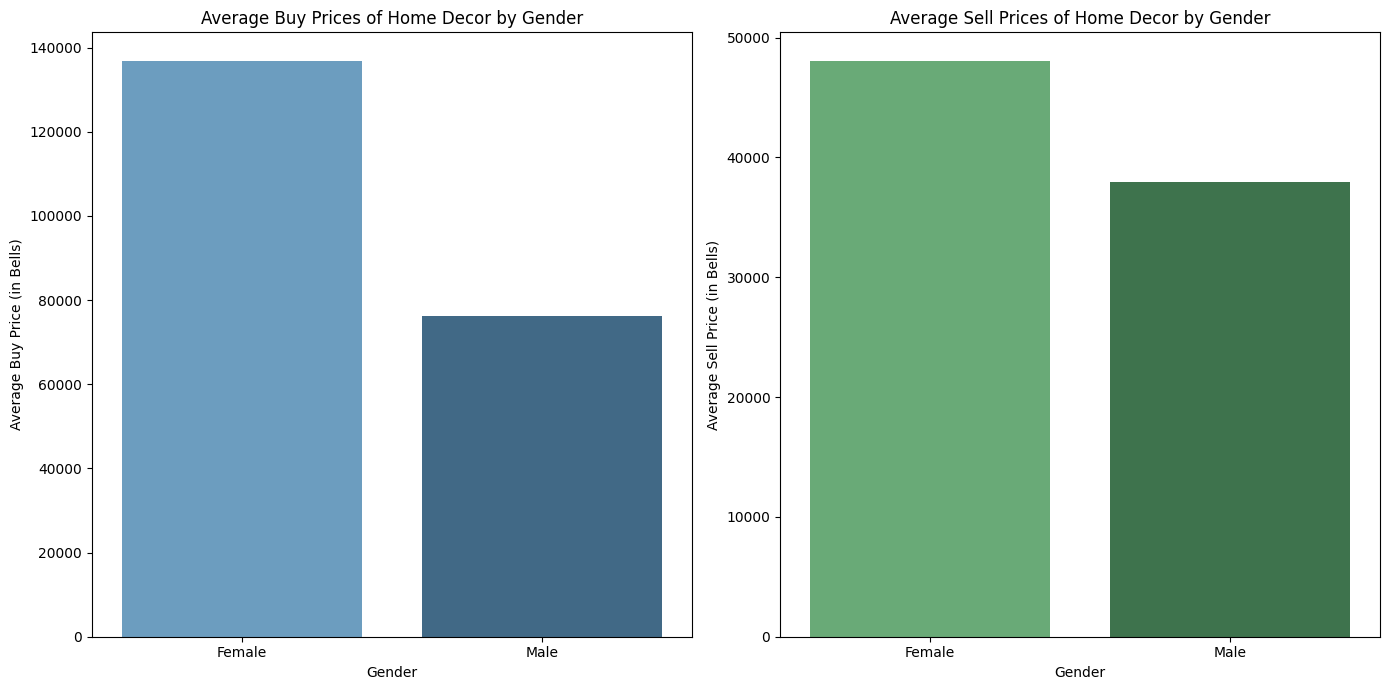

In [120]:
# Visualizing average buy and Sell Prices by gender
# Calculate average buy and sell pirces by gender
avg_prices_by_gender = villagers.groupby('Gender')[['Total Decor Buy Price', 'Total Decor Sell Price']].mean().sort_values(by='Total Decor Buy Price', ascending=False)
 
# Create bar plots:
plt.figure(figsize=(14,7))
 
# Subplot for avg buy prices
plt.subplot(1, 2, 1)
sns.barplot(x=avg_prices_by_gender.index, 
            y=avg_prices_by_gender['Total Decor Buy Price'], 
             palette='Blues_d')
plt.title('Average Buy Prices of Home Decor by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Buy Price (in Bells)')

# Subplot for avg sell prices
plt.subplot(1, 2, 2)
sns.barplot(x=avg_prices_by_gender.index,
            y=avg_prices_by_gender['Total Decor Sell Price'], 
            palette='Greens_d')
plt.title('Average Sell Prices of Home Decor by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sell Price (in Bells)')

plt.tight_layout()
plt.savefig(f"{viz_directory}/buy_and_sell_by_gender.png")
plt.show

In [121]:
# Visualizing average buy and Sell Prices by personality
# Calculate average buy and sell pirces by personality
avg_prices_by_personality = round(villagers.groupby('Personality')[['Total Decor Buy Price', 'Total Decor Sell Price']].mean().sort_values(by='Total Decor Buy Price', ascending=False), 2)
print(avg_prices_by_personality)

             Total Decor Buy Price  Total Decor Sell Price
Personality                                               
Snooty                   204293.75                63561.09
Smug                     158635.59                59853.32
Normal                   131642.37                46366.27
Peppy                     90637.76                35374.96
Big Sister                86326.25                41734.04
Cranky                    61670.00                44049.36
Jock                      59233.27                30393.69
Lazy                      58408.17                26873.58


In [122]:
# Calculate the average depreciation rate of home value from purchase cost to selling value
average_depreciation = round(((villagers['Total Decor Buy Price'].mean() - villagers['Total Decor Sell Price'].mean()) / villagers['Total Decor Buy Price'].mean()) * 100, 2)

average_depreciation

59.36

In [123]:
# Create and store function to calculate net profit or loss of homes
def calculate_net_value(df, buy_column, sell_column):
    df['Net Cost'] = df[sell_column] - df[buy_column]
    return df

# Test with villagers df
villagers_net_value = calculate_net_value(villagers, 'Total Decor Buy Price', 'Total Decor Sell Price')
villagers_net_value[['Name', 'Net Cost']].head()

,Name,Net Cost
0,Admiral,-7028.0
1,Agent S,-74430.0
2,Agnes,-37527.0
3,Al,-14641.0
4,Alfonso,-20190.0


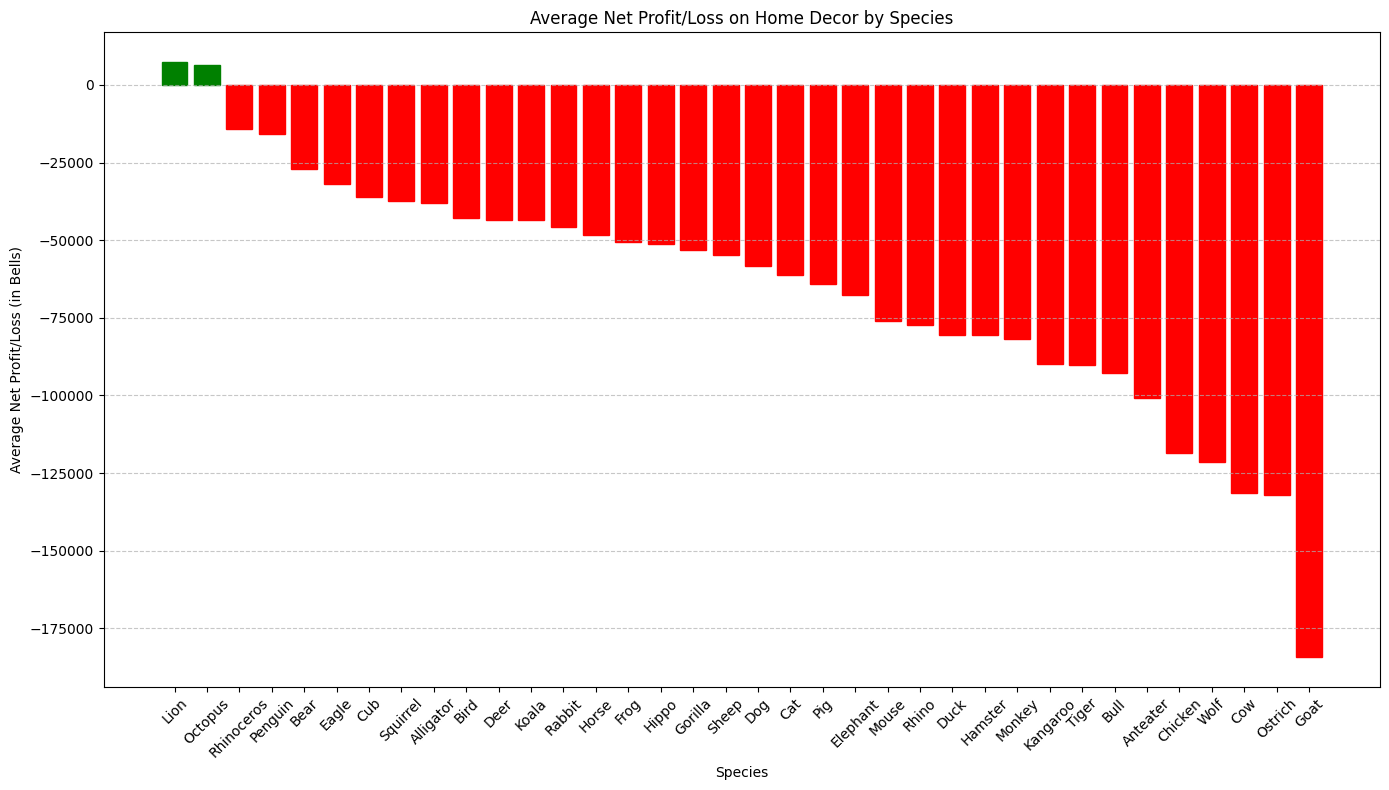

In [124]:
# Average Net Profit/Loss by species
avg_net_value_by_species = villagers_net_value.groupby('Species')['Net Cost'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.bar(avg_net_value_by_species.index, 
               avg_net_value_by_species.values)

# Adding data labels
for bar in bars:
    yval = bar.get_height()

# Color coding based on value
for bar in bars:
    bar.set_color('green' if bar.get_height() > 0 else 'red')

plt.title('Average Net Profit/Loss on Home Decor by Species')
plt.xlabel('Species')
plt.ylabel('Average Net Profit/Loss (in Bells)')
plt.xticks(rotation=45)
plt.grid(axis='y', 
         linestyle='--', 
         alpha=0.7)
plt.tight_layout()
plt.savefig(f"{viz_directory}/avg_net_by_species.png")
plt.show()

In [125]:
# Find character with highest net profit on decor resale
villagers_net_value.sort_values('Net Cost', ascending=False).head(2)

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID,Total Decor Buy Price,Total Decor Sell Price,Net Cost
188,Julian,Horse,Male,Smug,Music,15-Mar,glitter,Space K.K.,Gorgeous,Cool,Purple,Blue,starry-sky wall,cloud flooring,5956;5959;6827;3774;5955;5960;3961;5962;6829;6...,hrs13,CqhXFKr8hdfYSYpRA,4000.0,267325.0,263325.0
128,Elvis,Lion,Male,Cranky,Education,23-Jul,unh-hunh,K.K. Casbah,Gorgeous,Elegant,Red,Black,palace wall,palace tile,5955;5956;5961;5963;5956;5963;3473;5964;8825;5...,lon01,4jYpCpw9nooMZHR8s,6000.0,264025.0,258025.0


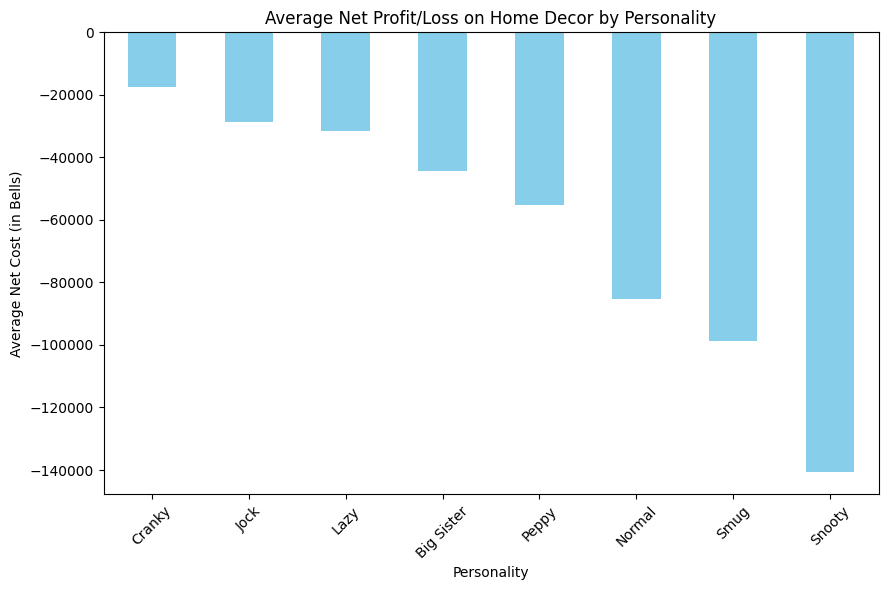

In [126]:
# Comparison of net home values by personality
# Use the previously defined calculate_net_value function to add 'Net Profit/Loss' to the DataFrame
villagers = calculate_net_value(villagers, 'Total Decor Buy Price', 'Total Decor Sell Price')

# Calculate average net cost by species
avg_net_by_personality = villagers.groupby('Personality')['Net Cost'].mean().sort_values(ascending=False)

# Plot the average net cost by personality
avg_net_by_personality.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Net Profit/Loss on Home Decor by Personality')
plt.xlabel('Personality')
plt.ylabel('Average Net Cost (in Bells)')
plt.xticks(rotation=45)
plt.savefig(f"{viz_directory}/avg_net_by_personality.png")
plt.show()

# Sugarshine Data Analysis

In [127]:
# Sugarshine specific data analysis

# Load Sugarshine villagers dataset
sugarshine_villagers = pd.read_csv('sugarshine_villager_names.csv')

# Filter the complete villagers dataset to only show sugarshine villagers, save csv of completed sugarshine dataset
sugarshine_df = villagers[villagers['Name'].isin(sugarshine_villagers['Name'])]
print(sugarshine_df)

sugarshine_df.to_csv('sugarshine_villagers_complete.csv')

         Name     Species  Gender Personality      Hobby Birthday Catchphrase  \
6        Alli   Alligator  Female      Snooty    Fashion    8-Nov     graaagh   
80     Chevre        Goat  Female      Normal  Education    6-Mar      la baa   
188    Julian       Horse    Male        Smug      Music   15-Mar     glitter   
236      Mira      Rabbit  Female  Big Sister    Fitness    6-Jul  cottontail   
254  Octavian     Octopus    Male      Cranky       Play   20-Sep      sucker   
259     Ozzie       Koala    Male        Lazy       Play    7-May    ol' bear   
269    Peanut    Squirrel  Female       Peppy    Fashion    8-Jun     slacker   
318     Rowan       Tiger    Male        Jock    Fitness   26-Aug       mango   
370    Ursala        Bear  Female  Big Sister      Music   16-Jan    grooomph   
391    Azalea  Rhinoceros  Female      Snooty     Nature   18-Dec       merci   

     Favorite Song   Style 1   Style 2     Color 1   Color 2  \
6        K.K. Soul  Gorgeous   Elegant      

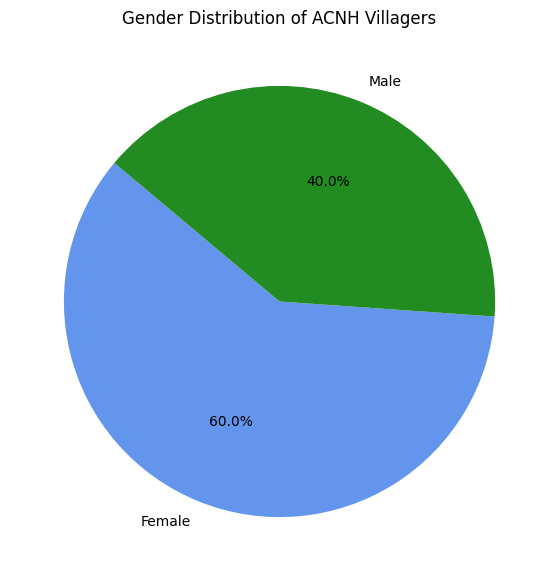

In [128]:
# Sugarshine Demographic Profile
# Calculate gender distribution among sugarshine villagers
gender_distribution = sugarshine_df['Gender'].value_counts()

# Pie chart visualization setup
plt.figure(figsize=(7,7))
plt.pie(
    gender_distribution, 
    labels=gender_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140,
    colors = [
        'cornflowerblue', 'forestgreen'
    ])
plt.title('Gender Distribution of ACNH Villagers')

# Save and show
plt.savefig(f"{viz_directory}/Sugarshine_Gender_Distribution.png")
plt.show()

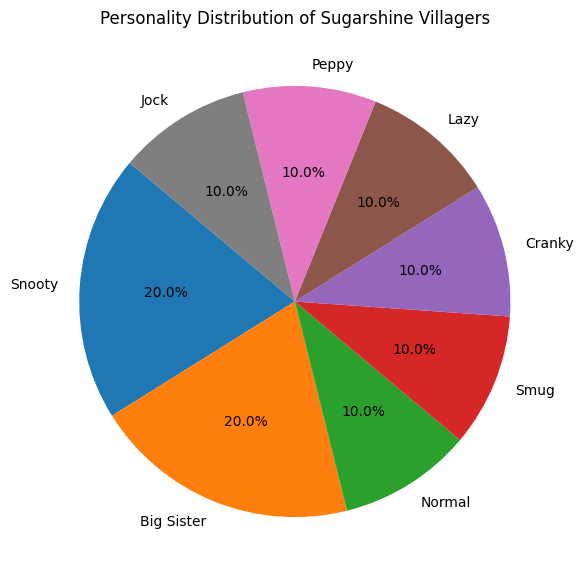

In [129]:
# Sugarshine Demographic Profile
# Calculate gender distribution among sugarshine villagers
personality_distribution = sugarshine_df['Personality'].value_counts()

# Pie chart visualization setup
plt.figure(figsize=(7,7))
plt.pie(personality_distribution, 
        labels=personality_distribution.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Personality Distribution of Sugarshine Villagers')
# Save and show
plt.savefig(f"{viz_directory}/Sugarshine_Personality_Distribution.png")
plt.show()

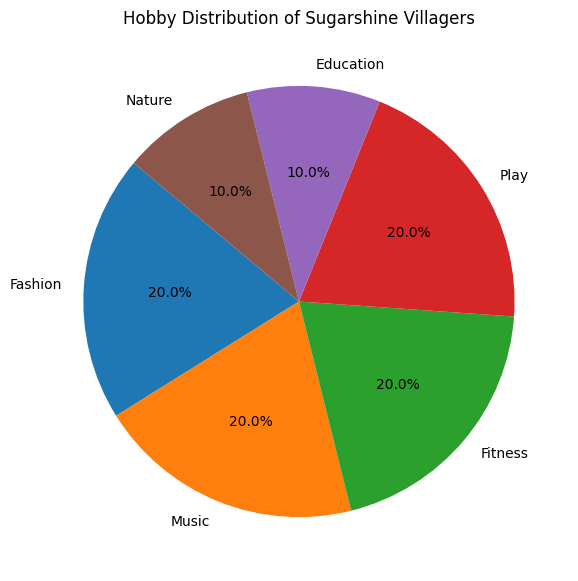

In [130]:
# Sugarshine Demographic Profile
# Calculate hobby distribution among sugarshine villagers
hobby_distribution = sugarshine_df['Hobby'].value_counts()

# Pie chart visualization setup
plt.figure(figsize=(7,7))
plt.pie(hobby_distribution, 
        labels=hobby_distribution.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Hobby Distribution of Sugarshine Villagers')
# Save and show
plt.savefig(f"{viz_directory}/Sugarshine_Hobby_Distribution.png")
plt.show()

In [131]:
# Calculate average cost to buy and sell prices of Sugarshine home decor
sugarshine_average_buy_value = round(sugarshine_df['Total Decor Buy Price'].mean(), 2)
sugarshine_average_sell_value = round(sugarshine_df['Total Decor Sell Price'].mean(), 2)

sugarshine_average_buy_value, sugarshine_average_sell_value

(106562.0, 68416.6)

In [132]:
# Calculate the average depreciation rate of home value from purchase cost to selling value
average_depreciation = round(((sugarshine_df['Total Decor Buy Price'].mean() - sugarshine_df['Total Decor Sell Price'].mean()) / sugarshine_df['Total Decor Buy Price'].mean()) * 100, 2)

average_depreciation

35.8

<function matplotlib.pyplot.show(close=None, block=None)>

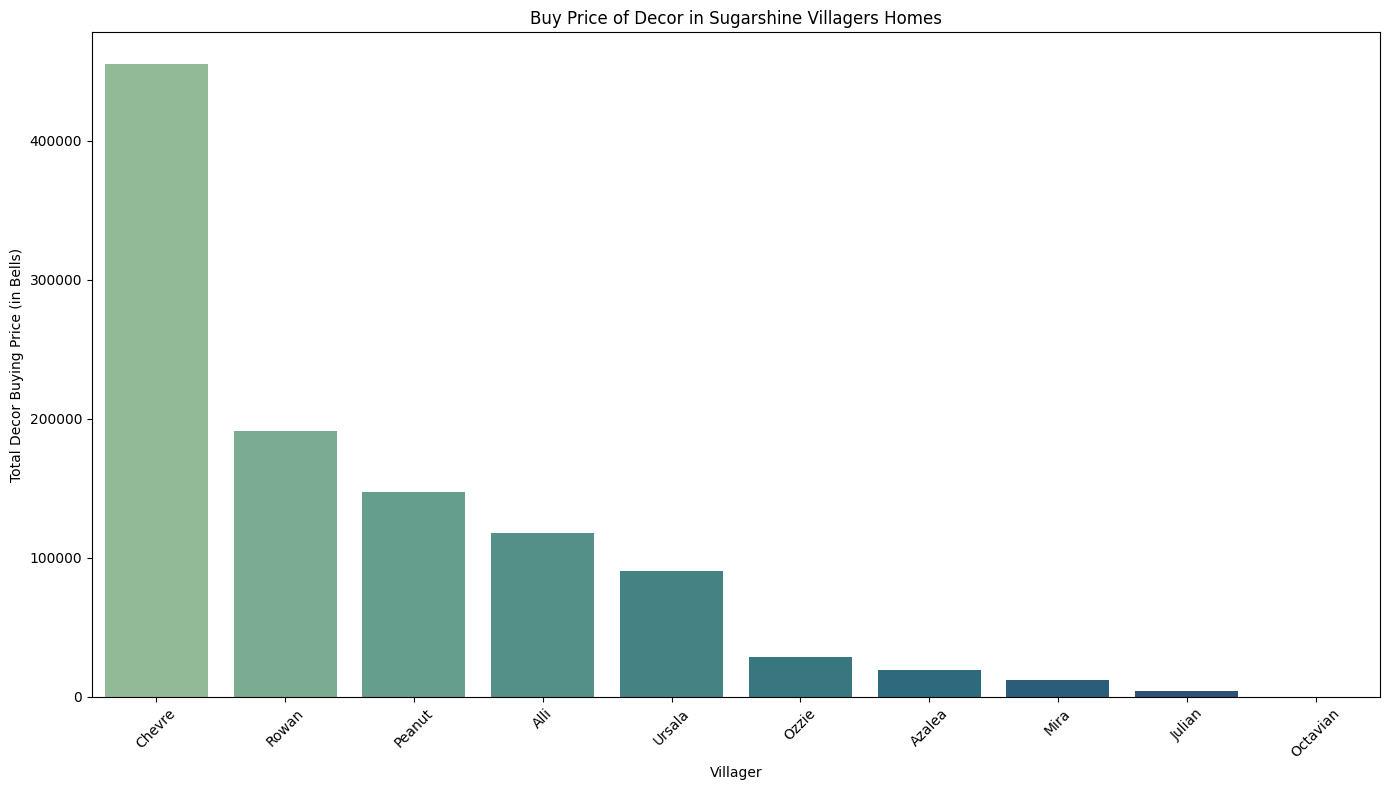

In [133]:
# Bar chart of Sugarshine home decor purchase costs
# Sort the DataFrame by 'Total Decor Buy Price' in descending order before plotting
sugarshine_buy_sorted = sugarshine_df.sort_values('Total Decor Buy Price', ascending=False)
# Create plot
plt.figure(figsize=(14,8))
sugarshine_buy_value_plot = sns.barplot(x='Name', 
                                        y='Total Decor Buy Price', 
                                        data=sugarshine_buy_sorted, 
                                        palette='crest')
plt.title('Buy Price of Decor in Sugarshine Villagers Homes')
plt.xlabel('Villager')
plt.ylabel('Total Decor Buying Price (in Bells)')
plt.xticks(rotation=45)
plt.tight_layout()
# Save and show
plt.savefig('Visualizations/sugarshine_home_buy_values.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

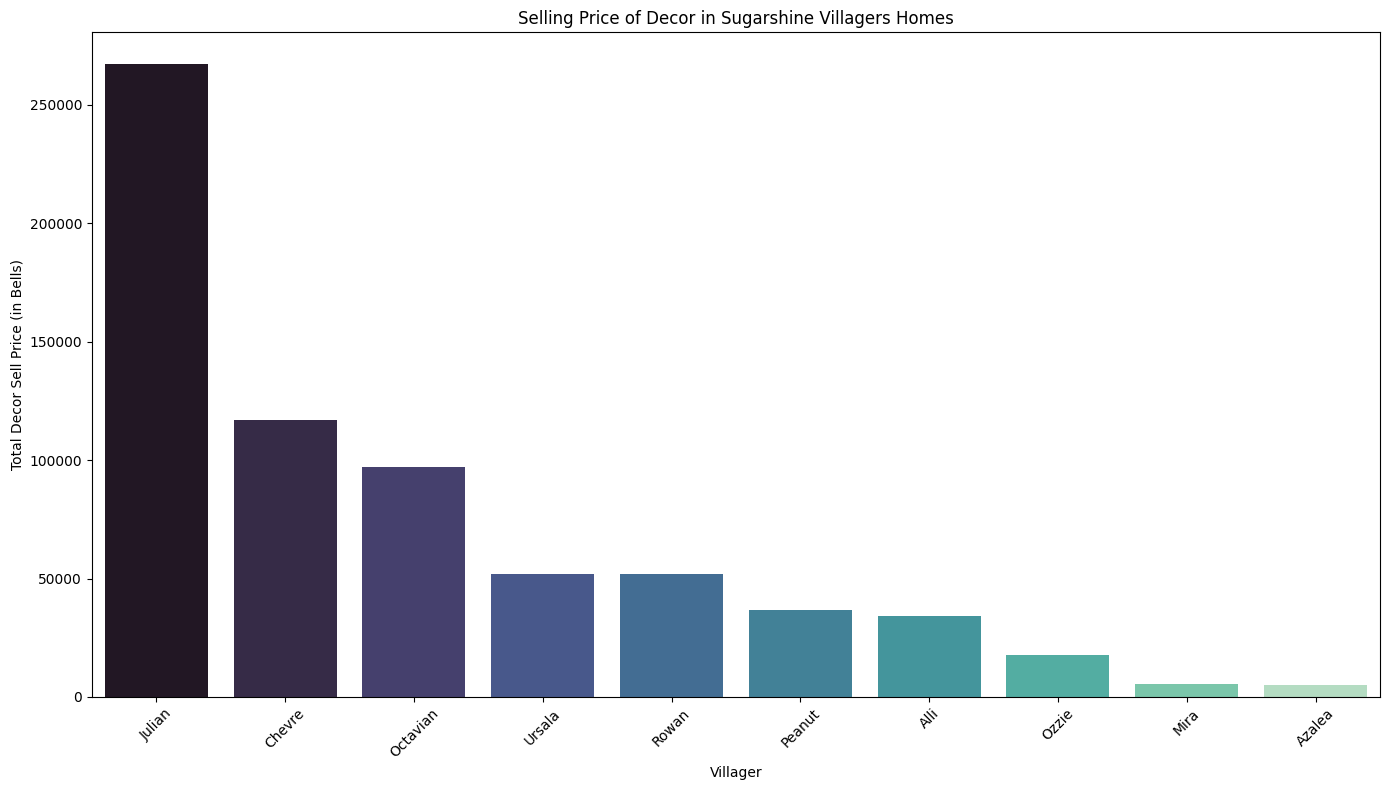

In [134]:
# Bar chart of Sugarshine home decor selling prices
# Sort the DataFrame by 'Total Decor Buy Price' in descending order before plotting
sugarshine_sell_sorted = sugarshine_df.sort_values('Total Decor Sell Price', ascending=False)
# Create plot
# Create plot
plt.figure(figsize=(14,8))
sugarshine_sell_value_plot = sns.barplot(x='Name', 
                                        y='Total Decor Sell Price', 
                                        data=sugarshine_sell_sorted, 
                                        palette='mako')
plt.title('Selling Price of Decor in Sugarshine Villagers Homes')
plt.xlabel('Villager')
plt.ylabel('Total Decor Sell Price (in Bells)')
plt.xticks(rotation=45)
plt.tight_layout()
# Save and show
plt.savefig(f"{viz_directory}/sugarshine_home_sell_values.png")
plt.show

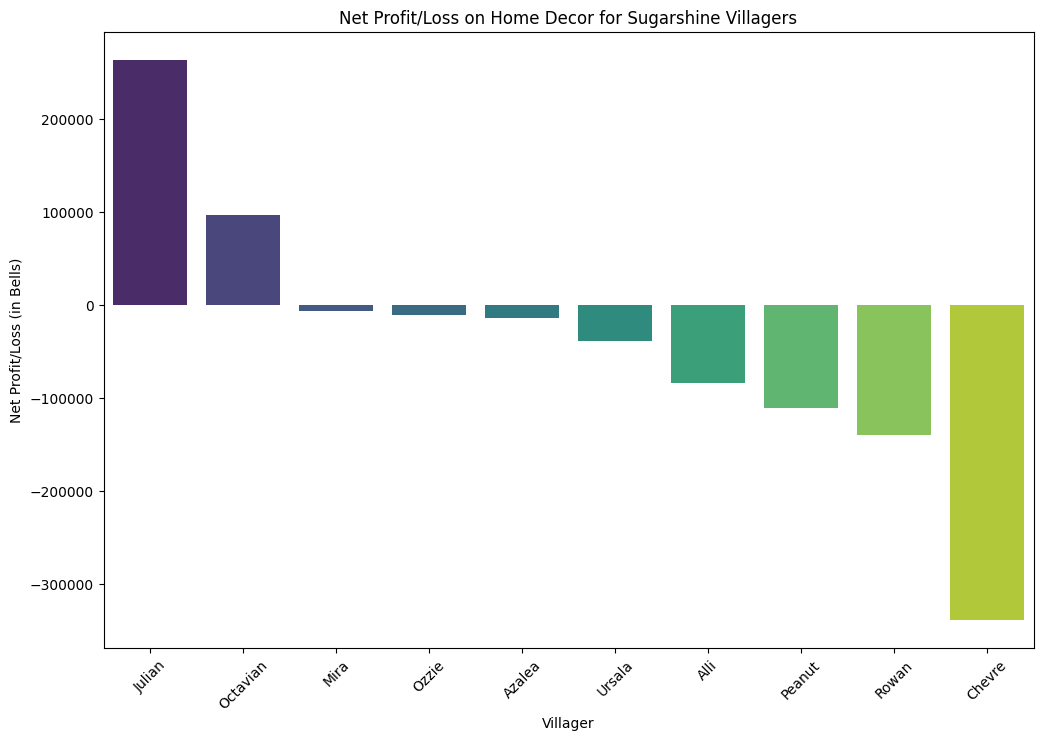

In [135]:
# Calculate Net Cost for Sugarshine Villagers
calculate_net_value(sugarshine_df, 'Total Decor Buy Price', 'Total Decor Sell Price')
sugarshine_df_sorted = sugarshine_df.sort_values('Net Cost', ascending=False)
# Create a bar chart
plt.figure(figsize=(12, 8))
net_value_plot = sns.barplot(x='Name', 
                             y='Net Cost', 
                             data=sugarshine_df_sorted, 
                             palette="viridis")
plt.title('Net Profit/Loss on Home Decor for Sugarshine Villagers')
plt.xlabel('Villager')
plt.ylabel('Net Profit/Loss (in Bells)')
plt.xticks(rotation=45)
plt.savefig(f"{viz_directory}/sugarshine_net_decor_values.png")
plt.show()